In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.cm as cm
import numpy as np
import pandas as pd
import os
import math


In [2]:
file = r'D:\UNI\MILJOETEK\4. semester\Sensitivity\Remaning N2O sensitivity_.xlsx'

save_dir = r'D:\UNI\MILJOETEK\4. semester\Calculations\FU'
# Create the directory if it doesn't exist
os.makedirs(save_dir, exist_ok=True)

sheets = 'Data'

df = pd.read_excel(file, sheet_name=sheets)
col = df.columns
col = [col[0],col[2]]
df = df[col]

In [3]:
df_cols = df.columns
df_cols = df_cols.to_list()
df_cols1 = df_cols[1:]
df_cols2 = df_cols[:1]

In [4]:
df_norm = pd.DataFrame().reindex_like(df) #https://stackoverflow.com/questions/23195250/create-empty-dataframe-with-same-dimensions-as-another
for i in df_cols1:
    scaling_factor = max(df[i])
    for j in range(len(df['Scenario'])):
        df_norm[i][j] = df[i][j]/scaling_factor

for i in df_cols2:
    for j in range(len(df['Scenario'])):
        df_norm[i][j] = df[i][j]

# Selecting the columns from 8th column onwards
columns_to_plot = df_norm.columns[1:]


C:\Users\rwint\AppData\Local\Temp\ipykernel_7548\2673821632.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'MDU 50 L cylinder 4% remaning' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_norm[i][j] = df[i][j]


C:\Users\rwint\AppData\Local\Temp\ipykernel_7548\2168766117.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab20')


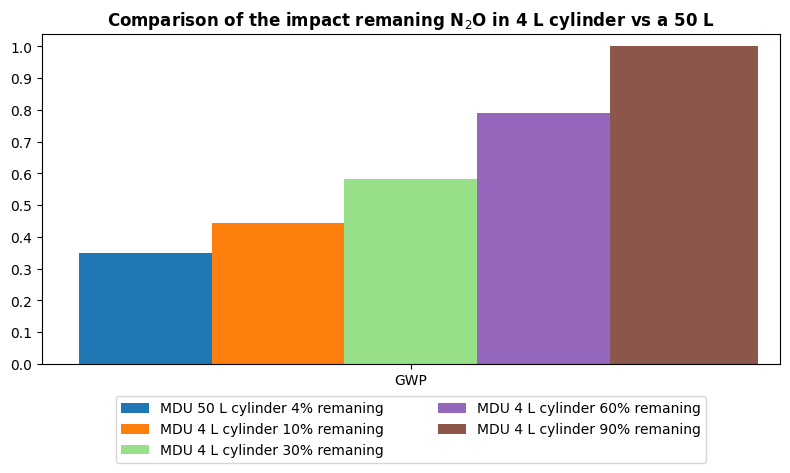

In [5]:
cmap = plt.cm.get_cmap('tab20')
colors = [cmap(i) for i in np.linspace(0, 1.5, 12)]

# Plotting
fig, ax = plt.subplots(figsize=(8, 5))

num_processes = len(df_norm)
bar_width = 0.2# Adjust as needed
index = np.arange(len(columns_to_plot))

for i, (process, col) in enumerate(zip(df_norm.index, colors)):
    val = df_norm.loc[process, columns_to_plot].values
    ax.bar(index + i*0.9 * bar_width, val, bar_width, label=process, color=col)
        
plt.xlim(-0.15, 0.85)
plt.ylim(0, 1.04)
plt.yticks(np.arange(0, 1.01, step=0.1))

# Setting labels and title
ax.set_title('Comparison of the impact remaning N$_2$O in 4 L cylinder vs a 50 L',weight='bold')
ax.set_xticks(index + bar_width+0.15)
ax.set_xticklabels(columns_to_plot)

ax.legend(df_norm['Scenario'],bbox_to_anchor=(0.1, -0.3, 0.8, 0.2), loc="lower left", mode="expand", borderaxespad=0,  ncol=2)
plt.tight_layout()
plt.savefig(os.path.join(save_dir, 'FU_sens.jpg'), bbox_inches='tight')
plt.show()